In [ ]:
#2.1 - MNIST Images

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset
import numpy as np

In [ ]:
# Transform (only tensor conversion)
transform = transforms.ToTensor()

# Download MNIST
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create subset of 1000 samples
subset_indices = torch.randperm(len(mnist))[:1000]
mnist_subset = Subset(mnist, subset_indices)

# Extract images and labels
images = torch.stack([mnist_subset[i][0].squeeze() for i in range(1000)])
labels = torch.tensor([mnist_subset[i][1] for i in range(1000)])

print(images.shape)

100%|██████████| 9.91M/9.91M [00:00<00:00, 35.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.17MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.98MB/s]


torch.Size([1000, 28, 28])


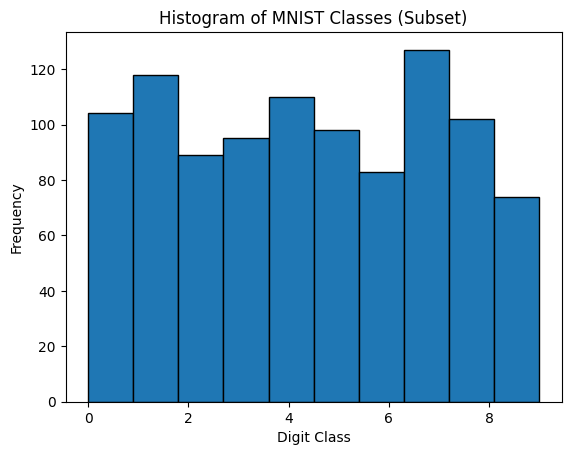

In [ ]:
import matplotlib.pyplot as plt

plt.hist(labels.numpy(), bins=10, edgecolor='black')
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Classes (Subset)")
plt.show()

In [ ]:
!pip install einops
from einops import rearrange

batch_size = 25
num_batches = 1000 // batch_size

batched_images = rearrange(images,
                           '(b bs) h w -> b bs 1 h w',
                           b=num_batches, bs=batch_size)

print(batched_images.shape)

torch.Size([40, 25, 1, 28, 28])


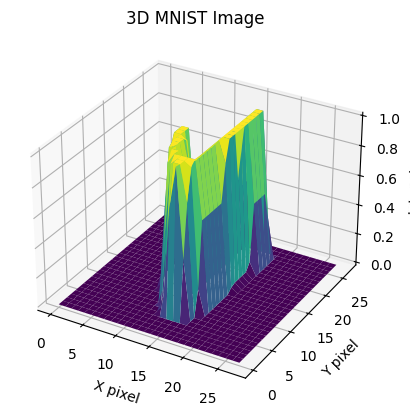

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Select random image
idx = np.random.randint(0, 1000)
img = images[idx].numpy()

x = np.arange(28)
y = np.arange(28)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, img, cmap='viridis')

ax.set_xlabel('X pixel')
ax.set_ylabel('Y pixel')
ax.set_zlabel('Intensity')
plt.title("3D MNIST Image")
plt.show()


In [ ]:
#2.2 Time series (Energy data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/HW1/energydata_complete.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


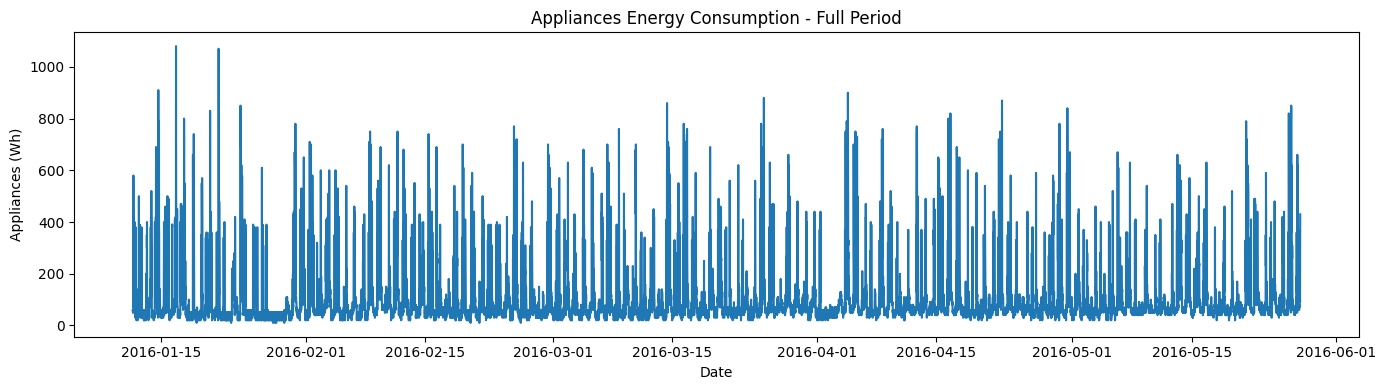

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['Appliances'])
plt.title("Appliances Energy Consumption - Full Period")
plt.xlabel("Date")
plt.ylabel("Appliances (Wh)")
plt.tight_layout()
plt.show()

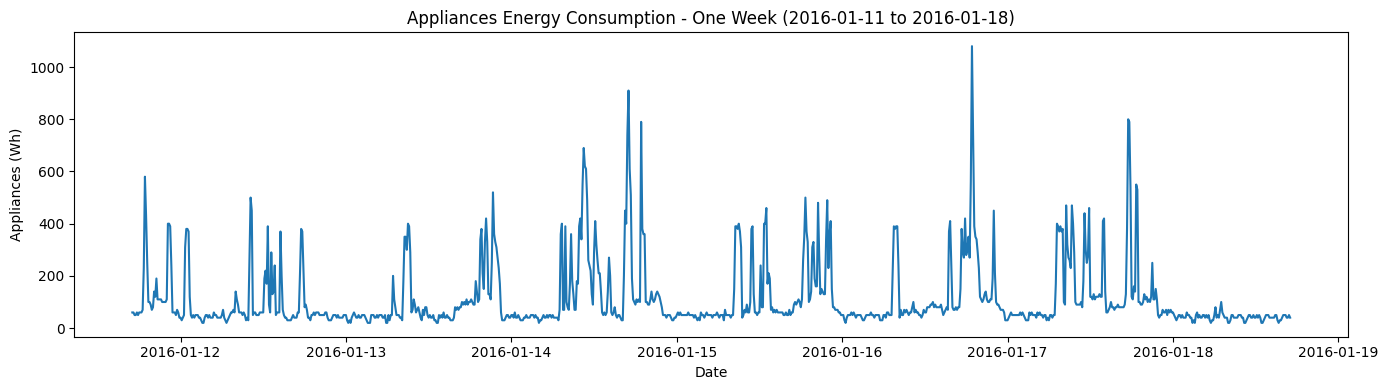

In [ ]:
# Pick first timestamp from index
week_start = df.index[0]
week_end = week_start + pd.Timedelta(days=7)

# Slice by index (best way for time series)
week_df = df.loc[week_start:week_end].copy()

plt.figure(figsize=(14,4))
plt.plot(week_df.index, week_df['Appliances'])
plt.title(f"Appliances Energy Consumption - One Week ({week_start.date()} to {week_end.date()})")
plt.xlabel("Date")
plt.ylabel("Appliances (Wh)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-4256388576.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = w['Appliances'].resample('1H').mean().to_frame('Appliances')
/tmp/ipython-input-4256388576.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat = hourly.pivot_table(index='day', columns='hour', values='Appliances', aggfunc='mean')


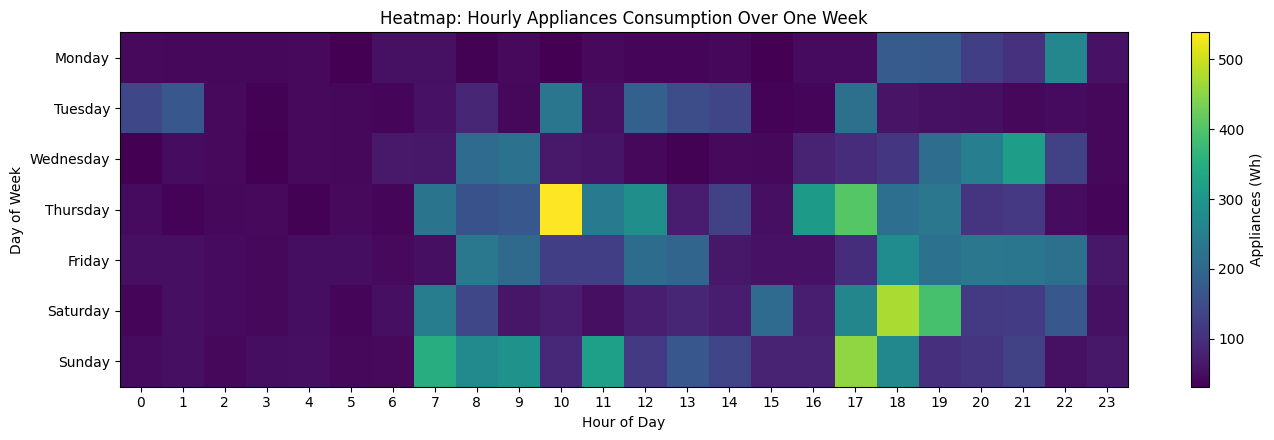

In [ ]:
# No need to set index again
w = week_df.copy()

# Resample to hourly mean
hourly = w['Appliances'].resample('1H').mean().to_frame('Appliances')

# Create day-of-week and hour features
hourly['day'] = hourly.index.day_name()
hourly['hour'] = hourly.index.hour

# Keep ordering Mon..Sun
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hourly['day'] = pd.Categorical(hourly['day'], categories=day_order, ordered=True)

# Pivot
heat = hourly.pivot_table(index='day', columns='hour', values='Appliances', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14,4.5))
plt.imshow(heat.values, aspect='auto')
plt.title("Heatmap: Hourly Appliances Consumption Over One Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.xticks(ticks=np.arange(24), labels=np.arange(24))
plt.yticks(ticks=np.arange(len(heat.index)), labels=heat.index.astype(str))
plt.colorbar(label="Appliances (Wh)")
plt.tight_layout()
plt.show()


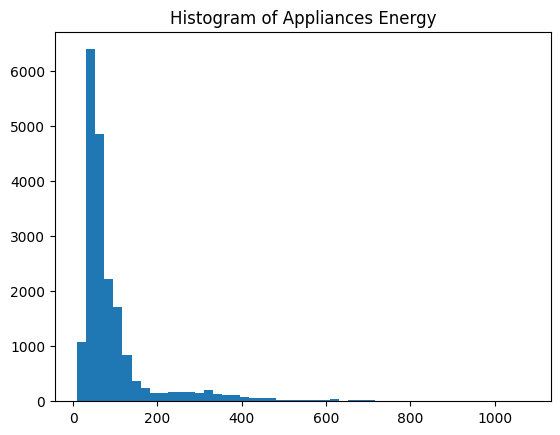

In [ ]:
plt.hist(df['Appliances'], bins=50)
plt.title("Histogram of Appliances Energy")
plt.show()

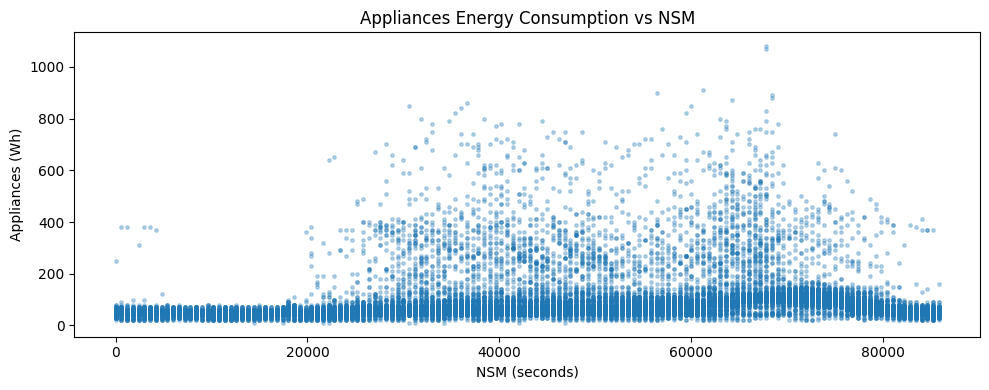

In [ ]:
df['NSM'] = df.index.hour*3600 + df.index.minute*60

plt.figure(figsize=(10,4))
plt.scatter(df['NSM'], df['Appliances'], s=6, alpha=0.3)
plt.title("Appliances Energy Consumption vs NSM")
plt.xlabel("NSM (seconds)")
plt.ylabel("Appliances (Wh)")
plt.tight_layout()
plt.show()

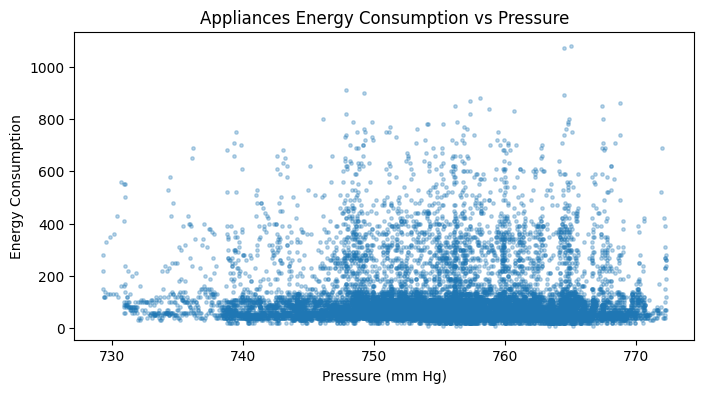

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(df['Press_mm_hg'], df['Appliances'],s=6, alpha=0.3)
plt.title("Appliances Energy Consumption vs Pressure")
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Energy Consumption")
plt.show()


In [ ]:
airfoil = pd.read_csv('/content/HW1/airfoil_self_noise.dat',
                      delim_whitespace=True,
                      header=None)

airfoil.columns = [
    'Frequency',
    'Angle_of_Attack',
    'Chord_Length',
    'Velocity',
    'Displacement_Thickness',
    'Sound_Pressure_Level'
]

airfoil.head()


/tmp/ipython-input-4279935027.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  airfoil = pd.read_csv('/content/HW1/airfoil_self_noise.dat',


,Frequency,Angle_of_Attack,Chord_Length,Velocity,Displacement_Thickness,Sound_Pressure_Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
stats = pd.DataFrame({
    'Mean': airfoil.mean(),
    'Variance': airfoil.var(),
    'Median': airfoil.median(),
    'Kurtosis': airfoil.kurtosis(),
    'Skewness': airfoil.skew(),
    'Range': airfoil.max() - airfoil.min()
})

stats


,Mean,Variance,Median,Kurtosis,Skewness,Range
Frequency,2886.380572,9.938717e+06,1600.000000,5.708685,2.137084,19800.000000
Angle_of_Attack,6.782302,3.502424e+01,5.400000,-0.412951,0.689164,22.200000
Chord_Length,0.136548,8.749868e-03,0.101600,-1.037964,0.457457,0.279400
Velocity,50.860745,2.425116e+02,39.600000,-1.563951,0.235852,39.600000
Displacement_Thickness,0.011140,1.729287e-04,0.004957,2.218903,1.702165,0.058011
Sound_Pressure_Level,124.835943,4.759146e+01,125.721000,-0.314187,-0.418952,37.607000


In [ ]:
#3.1 Image Processing

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import transforms


In [ ]:
# Fixed leaf path
leaf_folder = "/content/HW1/Agricultural_Image_Analytics/leaves"
aug_save_folder = "/content/HW1_out/augmented_all"
os.makedirs(aug_save_folder, exist_ok=True)

valid_ext = (".png")
leaf_files = [f for f in os.listdir(leaf_folder) if f.lower().endswith(valid_ext)]
assert len(leaf_files) > 0, f"No images found in: {leaf_folder}"

print("Leaf images found:", len(leaf_files), leaf_files)

Leaf images found: 8 ['I5.png', 'I3.png', 'I7.png', 'I1.png', 'I4.png', 'I2.png', 'I8.png', 'I6.png']


In [ ]:
# Augmentation + Image generation
transform_aug = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomAffine(
        degrees=30,              # rotate
        translate=(0.15, 0.15),  # shift
        scale=(0.8, 1.2),        # scale
        shear=15                 # warp-like
    ),
    transforms.RandomPerspective(distortion_scale=0.4, p=0.7),  # warp
    transforms.ToTensor()
])

to_pil = transforms.ToPILImage()
total_aug = 0

for image_name in leaf_files:
    image_path = os.path.join(leaf_folder, image_name)
    image = Image.open(image_path).convert("RGB")

    for i in range(100):
        aug_img = transform_aug(image)
        save_name = f"{os.path.splitext(image_name)[0]}_aug_{i:03d}.png"
        to_pil(aug_img).save(os.path.join(aug_save_folder, save_name))
        total_aug += 1

print("Total augmented images generated:", total_aug)
print("Augmented images saved to:", aug_save_folder)

Total augmented images generated: 800
Augmented images saved to: /content/HW1_out/augmented_all


In [ ]:
# Patch Extraction: random 32x32 patches from ALL leaf images

PATCH_SIZE = 32
PATCHES_PER_IMAGE = 200
rng = np.random.default_rng(42)

def random_patches(pil_img, patch_size=32, n_patches=200, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    w, h = pil_img.size
    assert w >= patch_size and h >= patch_size, "Patch size too large for image."
    patches = []
    for _ in range(n_patches):
        x = int(rng.integers(0, w - patch_size + 1))
        y = int(rng.integers(0, h - patch_size + 1))
        patches.append(pil_img.crop((x, y, x + patch_size, y + patch_size)))
    return patches

all_patches = []
for image_name in leaf_files:
    image_path = os.path.join(leaf_folder, image_name)
    image = Image.open(image_path).convert("RGB")
    all_patches.extend(random_patches(image, PATCH_SIZE, PATCHES_PER_IMAGE, rng))

# (N,H,W,C) float32 in [0,1]
patches_np = np.stack([np.asarray(p).astype(np.float32) / 255.0 for p in all_patches], axis=0)
print("Total patches extracted:", patches_np.shape[0])
print("Patches shape:", patches_np.shape)  # (N, 32, 32, 3)

Total patches extracted: 1600
Patches shape: (1600, 32, 32, 3)


In [ ]:
# 3) ZCA Whitening (Prewhitening)
def zca_whiten(patches_nhwc, epsilon=1e-5):
    N, H, W, C = patches_nhwc.shape
    X = patches_nhwc.reshape(N, -1)  # (N, D)

    mu = X.mean(axis=0, keepdims=True)
    Xc = X - mu

    cov = (Xc.T @ Xc) / (N - 1)  # (D, D)

    U, S, _ = np.linalg.svd(cov, full_matrices=False)
    zca = U @ np.diag(1.0 / np.sqrt(S + epsilon)) @ U.T

    Xw = Xc @ zca
    patches_white = Xw.reshape(N, H, W, C)
    return patches_white

patches_white = zca_whiten(patches_np, epsilon=1e-5)
print("Whitened patches shape:", patches_white.shape)

Whitened patches shape: (1600, 32, 32, 3)


In [ ]:
def plot_channel_hists(patches_nhwc, title_prefix, bins=80):
    channels = ["R", "G", "B"]
    plt.figure(figsize=(14, 4))
    for c in range(3):
        plt.subplot(1, 3, c + 1)
        vals = patches_nhwc[..., c].ravel()
        plt.hist(vals, bins=bins, edgecolor="black")
        plt.title(f"{title_prefix} — {channels[c]}")
        plt.xlabel("Value")
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

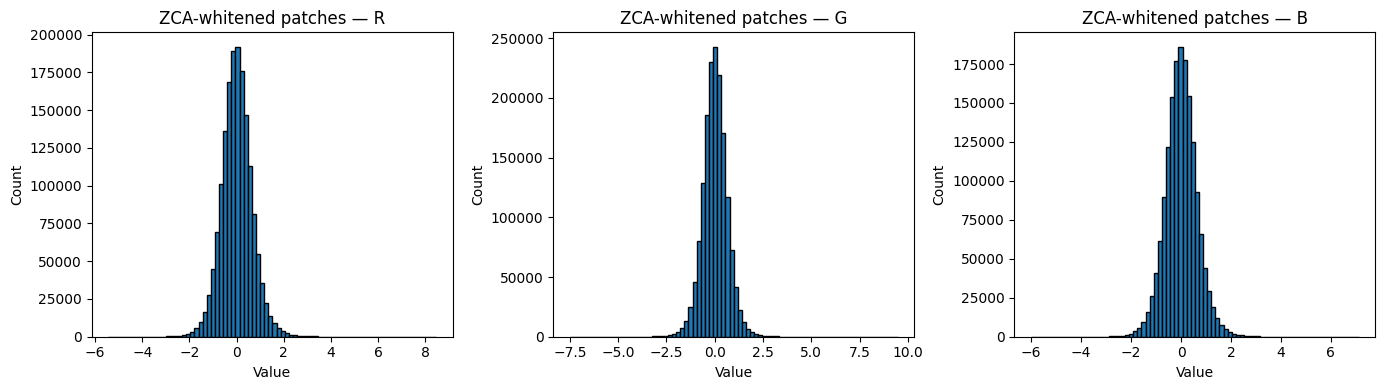

In [ ]:
#3.2 Image segmentation

In [35]:
import os
import glob
import cv2
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy.signal import find_peaks
from google.colab.patches import cv2_imshow

INPUT_DIR  = "/content/Agricultural_Image_Analytics"
OUTPUT_DIR = "/content/Agricultural_Image_Analytics/segmented_outputs5"

N_ROWS = 6
N_COLS = 6

# HSV range for green vegetation
GREEN_LO = np.array([30,  40,  40])
GREEN_HI = np.array([90, 255, 255])
# HSV range for white calibration panels
WHITE_LO = np.array([0,   0, 185])
WHITE_HI = np.array([180, 60, 255])

PANEL_MIN_AREA = 8_000
PANEL_MAX_AREA = 100_000
BOX_COLOR      = (0, 0, 255)   # red (BGR)
TEXT_COLOR     = (0, 0, 255)
BOX_THICKNESS  = 3
FONT_SCALE     = 1.2

def get_green_mask(img):
    """Extract green vegetation using HSV thresholding."""
    hsv    = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask   = cv2.inRange(hsv, GREEN_LO, GREEN_HI)
    kernel = np.ones((5, 5), np.uint8)
    mask   = cv2.morphologyEx(mask, cv2.MORPH_OPEN,  kernel)
    mask   = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    return mask

def find_calibration_panels(img):
    """Detect white calibration panels; return list of (cx, cy) centres."""
    hsv        = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    white_mask = cv2.inRange(hsv, WHITE_LO, WHITE_HI)
    kernel     = np.ones((15, 15), np.uint8)
    white_mask = cv2.morphologyEx(white_mask, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(white_mask, cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE)
    panels = []
    for c in contours:
        area = cv2.contourArea(c)
        if PANEL_MIN_AREA < area < PANEL_MAX_AREA:
            x, y, w, h = cv2.boundingRect(c)
            if 0.3 < w / max(h, 1) < 3.0:
                panels.append((x + w // 2, y + h // 2))
    return panels


def get_plot_bbox(img):
    """
    Compute plot boundary from calibration panel centres.
    Returns (x1, y1, x2, y2); falls back to full image if < 3 panels found.
    """
    H, W   = img.shape[:2]
    panels = find_calibration_panels(img)
    if len(panels) < 3:
        return 0, 0, W, H
    xs, ys = [p[0] for p in panels], [p[1] for p in panels]
    mx = (max(xs) - min(xs)) * 0.05
    my = (max(ys) - min(ys)) * 0.05
    return (max(0, int(min(xs) - mx)), max(0, int(min(ys) - my)),
            min(W, int(max(xs) + mx)), min(H, int(max(ys) + my)))

def find_N_strongest_peaks(signal, N, min_distance):
    """Return exactly N peaks ranked by prominence."""
    peaks, props = find_peaks(signal, distance=min_distance, prominence=0)
    if len(peaks) == 0:
        return list(np.linspace(0, len(signal) - 1, N, dtype=int))
    order = np.argsort(props['prominences'])[-N:]
    return sorted(peaks[order].tolist())

def peaks_to_bbox_edges(peaks, total_length):
    """Convert sorted peak positions to (lo, hi) bounding-box edge pairs."""
    edges = []
    for i, p in enumerate(peaks):
        lo = max(0, p - (peaks[1] - peaks[0]) // 2) if i == 0 \
             else (peaks[i - 1] + p) // 2
        hi = min(total_length - 1, p + (p - peaks[-2]) // 2) if i == len(peaks) - 1 \
             else (p + peaks[i + 1]) // 2
        edges.append((lo, hi))
    return edges

def extract_subplot_bboxes(img, n_rows=N_ROWS, n_cols=N_COLS):
    """
    Segment the 36 soybean subplots.
    Returns list of (x1, y1, x2, y2) in original image coords,
    ordered left-to-right then top-to-bottom.
    """
    px1, py1, px2, py2 = get_plot_bbox(img)
    mask = get_green_mask(img)
    roi  = mask[py1:py2, px1:px2]
    rH, rW = roi.shape

    smooth_r = max(20, rH // 20)
    smooth_c = max(20, rW // 20)
    row_proj = uniform_filter1d(roi.sum(axis=1).astype(float), size=smooth_r)
    col_proj = uniform_filter1d(roi.sum(axis=0).astype(float), size=smooth_c)

    row_peaks = find_N_strongest_peaks(row_proj, n_rows, rH // 12)
    col_peaks = find_N_strongest_peaks(col_proj, n_cols, rW // 12)

    row_edges = peaks_to_bbox_edges(row_peaks, rH)
    col_edges = peaks_to_bbox_edges(col_peaks, rW)

    bboxes = []
    for ry1, ry2 in row_edges:
        for cx1, cx2 in col_edges:
            bboxes.append((px1 + cx1, py1 + ry1, px1 + cx2, py1 + ry2))
    return bboxes

def annotate_image(img, bboxes):
    """Draw numbered red bounding boxes on a copy of the image."""
    out  = img.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    for idx, (x1, y1, x2, y2) in enumerate(bboxes, start=1):
        cv2.rectangle(out, (x1, y1), (x2, y2), BOX_COLOR, BOX_THICKNESS)
        label = str(idx)
        (tw, th), baseline = cv2.getTextSize(label, font, FONT_SCALE, 2)
        cv2.rectangle(out, (x1, y1),
                      (x1 + tw + 4, y1 + th + baseline + 4),
                      (255, 255, 255), -1)
        cv2.putText(out, label, (x1 + 2, y1 + th + 2),
                    font, FONT_SCALE, TEXT_COLOR, 2, cv2.LINE_AA)
    return out

os.makedirs(OUTPUT_DIR, exist_ok=True)

image_paths = sorted(
    glob.glob(os.path.join(INPUT_DIR, "*.JPG")) +
    glob.glob(os.path.join(INPUT_DIR, "*.jpg")) +
    glob.glob(os.path.join(INPUT_DIR, "*.png"))
)

if not image_paths:
    print(f"No images found in {INPUT_DIR}")
else:
    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            print(f"[SKIP] Could not read: {path}")
            continue

        bboxes    = extract_subplot_bboxes(img)
        annotated = annotate_image(img, bboxes)

        basename = os.path.splitext(os.path.basename(path))[0]
        out_path = os.path.join(OUTPUT_DIR, f"annotated_{basename}.jpg")
        cv2.imwrite(out_path, annotated)